In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# GeodataFrame & Geoseries

In [7]:
countries = gpd.read_file('1-introData/countries.gpkg')
cities = gpd.read_file('1-introData/cities.geojson')

# DataFrame vs GeoDataFrame

# GeoDataFrame
- ### Contains a GeoSeries
- Always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrames "geometry"
- Anytime you apply a spatial method to this dataframe, it will act on the aforementioned geometry column

# Regular DataFrame vs GeoDataFrame

In [11]:
dataFrame = countries[['NAME', 'POP_EST']]

dataFrame.head()
print(type(dataFrame))

geoDataFrame = countries[['geometry', 'NAME']]
geoDataFrame.head()
print(type(geoDataFrame))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [13]:
series = countries['NAME']
series[:5]
print(type(series))

geoSeries = countries['geometry']
print(type(geoSeries))

<class 'pandas.core.series.Series'>
<class 'geopandas.geoseries.GeoSeries'>


<ipython-input-15-cfa1b40ec873>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoDataFrame.centroid.plot(ax=ax)


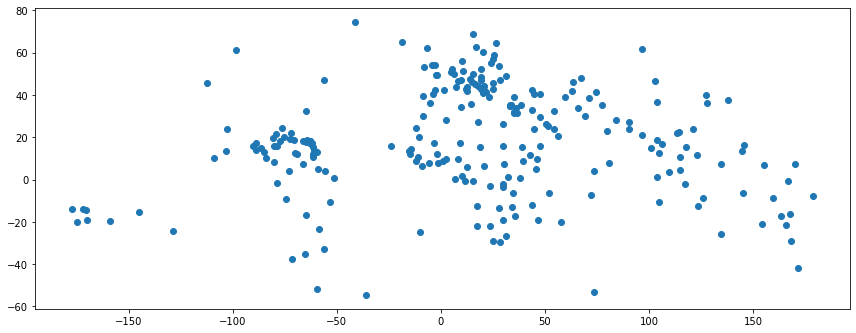

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
geoDataFrame.centroid.plot(ax=ax)
plt.tight_layout()

# Table Join vs Spatial Join

In [19]:
country_shapes = countries[['geometry', 'NAME']]

country_names = countries[['NAME', 'POP_EST']]

country_merged = country_shapes.merge(country_names, on='NAME', how='left')

In [24]:
# This gdf holds the geometry and country names
country_names = countries[['geometry', 'NAME']]

# This gdf holds the geometry and city names
cities_names = cities[['name', 'geometry']]

# Merge city names and country names
cities_with_country = gpd.sjoin(cities_names, country_names, how="inner", op='within')
cities_with_country.sample(5)

,name,geometry,index_right,NAME
4264,Baturité,POINT (-38.87999 -4.32957),45,Brazil
2272,Phayao,POINT (99.90831 19.17070),110,Thailand
7065,Marabá,POINT (-49.11598 -5.34997),45,Brazil
386,Dabola,POINT (-11.10900 10.74800),83,Guinea
197,Dandeldhura,POINT (80.60000 29.30000),143,Nepal
